# Experiments with MNIST and mapper classsifier

In [1]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.datasets import mnist
from contextlib import contextmanager
from timeit import default_timer

@contextmanager
def elapsed_timer():
    start = default_timer()
    elapser = lambda: default_timer() - start
    yield lambda: elapser()
    end = default_timer()
    elapser = lambda: end-start

Using TensorFlow backend.


## Load MNIST data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Dense NN classifier

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 1s 2ms/step - loss: 0.3601 - accuracy: 0.8998 - val_loss: 0.1968 - val_accuracy: 0.9439
Epoch 2/12
469/469 [==============================] - 1s 2ms/step - loss: 0.1649 - accuracy: 0.9528 - val_loss: 0.1359 - val_accuracy: 0.9609
Epoch 3/12
469/469 [==============================] - 1s 2ms/step - loss: 0.1186 - accuracy: 0.9662 - val_loss: 0.1116 - val_accuracy: 0.9665
Epoch 4/12
469/469 [==============================] - 1s 2ms/step - loss: 0.0921 - accuracy: 0.9738 - val_loss: 0.0954 - val_accuracy: 0.9716
Epoch 5/12
469/469 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9781 - val_loss: 0.0899 - val_accuracy: 0.9719
Epoch 6/12
469/469 [==============================] - 1s 2ms/step - loss: 0.0605 - accuracy: 0.9827 - val_loss: 0.0870 - val_accuracy: 0.9742
Epoch 7/12
469/469 [==============================] - 1s 2ms/step - loss: 0.0513 - accuracy: 0.9852 - val_loss: 0.0776 - val_accuracy: 0.9779
Epoch 

## Mapper Classifier

Brief outline of algorithm:
   - 

In [4]:
from lib.mapper_class_new import *

In [5]:
mapper = MapperClassifier(n_components=5, NRNN=3, n_intervals=10)

In [6]:
small_size = 10000
x_train_small = x_train[:small_size,::]
y_train_small = y_train[:small_size,::]

x_train_flat = np.reshape(x_train_small, (len(x_train_small),784))

with elapsed_timer() as elapsed:
    x_map = mapper.fit(x_train_flat).astype('float32')
print(elapsed())

517.075609915


In [7]:
print(x_train_flat.shape)
print(x_map.shape)

(10000, 784)
(10000, 9393)


In [8]:
mapper_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

mapper_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

mapper_model.fit(x_map, y_train_small,
          batch_size=batch_size,
          epochs=100,
          verbose=1)

Epoch 1/100
79/79 [==============================] - 0s 5ms/step - loss: 2.0061 - accuracy: 0.3384
Epoch 2/100
79/79 [==============================] - 0s 5ms/step - loss: 1.2419 - accuracy: 0.5924
Epoch 3/100
79/79 [==============================] - 0s 5ms/step - loss: 0.9844 - accuracy: 0.6753
Epoch 4/100
79/79 [==============================] - 0s 5ms/step - loss: 0.8465 - accuracy: 0.7348
Epoch 5/100
79/79 [==============================] - 0s 5ms/step - loss: 0.7380 - accuracy: 0.7804
Epoch 6/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.8149
Epoch 7/100
79/79 [==============================] - 0s 5ms/step - loss: 0.5891 - accuracy: 0.8274
Epoch 8/100
79/79 [==============================] - 0s 5ms/step - loss: 0.5410 - accuracy: 0.8403
Epoch 9/100
79/79 [==============================] - 0s 5ms/step - loss: 0.5060 - accuracy: 0.8474
Epoch 10/100
79/79 [==============================] - 0s 5ms/step - loss: 0.4790 - accuracy: 0.8521
Epoch 11/

79/79 [==============================] - 0s 5ms/step - loss: 0.2936 - accuracy: 0.8916
Epoch 84/100
79/79 [==============================] - 0s 6ms/step - loss: 0.2908 - accuracy: 0.8931
Epoch 85/100
79/79 [==============================] - 0s 5ms/step - loss: 0.2907 - accuracy: 0.8951
Epoch 86/100
79/79 [==============================] - 0s 6ms/step - loss: 0.2921 - accuracy: 0.8931
Epoch 87/100
79/79 [==============================] - 0s 5ms/step - loss: 0.2875 - accuracy: 0.8970
Epoch 88/100
79/79 [==============================] - 0s 5ms/step - loss: 0.2861 - accuracy: 0.8952
Epoch 89/100
79/79 [==============================] - 0s 5ms/step - loss: 0.2874 - accuracy: 0.8944
Epoch 90/100
79/79 [==============================] - 0s 5ms/step - loss: 0.2869 - accuracy: 0.8973
Epoch 91/100
79/79 [==============================] - 0s 5ms/step - loss: 0.2875 - accuracy: 0.8942
Epoch 92/100
79/79 [==============================] - 0s 5ms/step - loss: 0.2835 - accuracy: 0.8987
Epoch 93/100


In [9]:
def mapper_predict(x_test):
    x_map_test = mapper.project(np.reshape(x_test,(len(x_test),784)))
    return mapper_model.predict(x_map_test)

## Mapper Classifier profiling

## Tests

In [10]:
x_test_small = x_test[:100,::]
y_test_small = y_test[:100,::]

true = np.argmax(y_test_small,axis=1)
preds = np.argmax(model.predict(x_test_small),axis=1)

with elapsed_timer() as elapsed:
    preds_mapper = np.argmax(mapper_predict(x_test_small),axis=1)
print(elapsed())

# print(preds)
# print(preds_mapper)
# print(true)

print("accuracy: nnet: {}, mapper: {}".format(np.sum(preds==true)/len(true),np.sum(preds_mapper==true)/len(true)))

11.233298269999977
accuracy: nnet: 1.0, mapper: 0.83


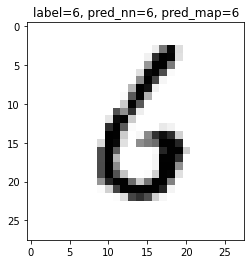

In [11]:
import matplotlib.pyplot as plt
import numpy as np

i=50
img=x_test[i]
pred_nn=np.argmax(model.predict(np.array([img])))
pred_map=np.argmax(mapper_predict(np.array([img])))
plt.imshow(np.squeeze(img), cmap = 'Greys')
plt.title("label={}, pred_nn={}, pred_map={}".format(np.argmax(y_test[i]),pred_nn,pred_map))
plt.show()